In [35]:
#Mengimpor beberapa modul yang dibutuhkan
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [36]:
#Menginstal paket xlrd dari repositori Anaconda. Pustaka xlrd untuk membaca file Excel dalam lingkungan Python.
#!conda install -c anaconda xlrd --yes

'conda' is not recognized as an internal or external command,
operable program or batch file.


In [37]:
#pip install xlrd

In [38]:
#openpyxl adalah pustaka Python yang digunakan untuk membaca dan menulis file Excel dalam format .xlsx.
#pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [39]:
#Membaca file csv
df_c = pd.read_csv(r'C:\\Users\Erika Winckler\Downloads\archive (2)\weatherAUS.csv')

                  
print ('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


In [40]:
#Menampilkan 5 baris pertama dari DataFrame
df_c.head(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


# **Preprocessing**

- cleansing (missing value, cek valid data)
- cek type data
- analisis tiap columns

In [41]:
#Menampilkan informasi yang ringkas tentang DataFrame, termasuk jumlah baris, jumlah kolom, tipe data kolom, serta jumlah nilai non-null dalam setiap kolom
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [42]:
#Menghitung jumlah kemunculan setiap nilai unik dalam kolom-kolom DataFrame
df_c.value_counts()

Date        Location      MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  RainTomorrow
2007-11-01  Canberra      8.0      24.3     0.0       3.4          6.3       NW           30.0           SW          NW          6.0           20.0          68.0         29.0         1019.7       1015.0       7.0       7.0       14.4     23.6     No         Yes             1
2014-01-23  Perth         22.7     36.2     0.0       12.0         13.1      SE           54.0           SSE         SE          11.0          22.0          52.0         29.0         1007.8       1006.0       1.0       3.0       28.2     35.9     No         No              1
2014-01-22  Woomera       21.9     32.0     0.0       20.0         2.2       SSE          50.0           SSE         SSE         31.0          15.0          39.0         28.0   

In [43]:
#Mengidentifikasi dan menghitung jumlah nilai-nilai null dalam DataFrame
df_c.isna().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [44]:
# cek field class
print(df_c['Date'].unique())
print(df_c['Location'].unique())
print(df_c['MinTemp'].unique())
print(df_c['MaxTemp'].unique())
print(df_c['Rainfall'].unique())
print(df_c['Evaporation'].unique())
print(df_c['Sunshine'].unique())
print(df_c['WindGustDir'].unique())
print(df_c['WindGustSpeed'].unique())
print(df_c['WindDir9am'].unique())
print(df_c['WindDir3pm'].unique())
print(df_c['WindSpeed9am'].unique())
print(df_c['WindSpeed3pm'].unique())
print(df_c['Humidity9am'].unique())
print(df_c['Humidity3pm'].unique())
print(df_c['Pressure9am'].unique())
print(df_c['Pressure3pm'].unique())
print(df_c['Cloud9am'].unique())
print(df_c['Cloud3pm'].unique())
print(df_c['Temp9am'].unique())
print(df_c['Temp3pm'].unique())
print(df_c['RainToday'].unique())
print(df_c['RainTomorrow'].unique())

['2008-12-01' '2008-12-02' '2008-12-03' ... '2008-01-29' '2008-01-30'
 '2008-01-31']
['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree' 'Newcastle'
 'NorahHead' 'NorfolkIsland' 'Penrith' 'Richmond' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtown' 'Wollongong' 'Canberra' 'Tuggeranong'
 'MountGinini' 'Ballarat' 'Bendigo' 'Sale' 'MelbourneAirport' 'Melbourne'
 'Mildura' 'Nhil' 'Portland' 'Watsonia' 'Dartmoor' 'Brisbane' 'Cairns'
 'GoldCoast' 'Townsville' 'Adelaide' 'MountGambier' 'Nuriootpa' 'Woomera'
 'Albany' 'Witchcliffe' 'PearceRAAF' 'PerthAirport' 'Perth' 'SalmonGums'
 'Walpole' 'Hobart' 'Launceston' 'AliceSprings' 'Darwin' 'Katherine'
 'Uluru']
[13.4  7.4 12.9  9.2 17.5 14.6 14.3  7.7  9.7 13.1 15.9 12.6  8.4  9.8
 14.1 13.5 11.2 11.5 17.1 20.5 15.3 16.2 16.9 20.1 19.7 12.5 12.  11.3
  9.6 10.5 12.3 13.7 16.1 14.  17.  17.3 17.2 17.4 19.8 14.9 13.9 18.6
 19.3 24.4 18.8 20.8 15.7 18.5 20.4 21.8 22.3 22.  28.  21.5 21.7 23.5
 28.3 18.4 12.4 13.3 18.  18.7 15.5  8.9 15.  15.4

In [45]:
df_c.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [46]:
#Menghapus beberapa kolom dari dataframe dengan menggunakan metode drop
df = df_c.drop(["Evaporation","Sunshine","Cloud9am","Cloud3pm","Location", "Date", 'WindDir9am', 'WindDir3pm', 'WindGustDir'], axis =1)
df.head(5)

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No


In [47]:
df.shape

(145460, 14)

In [48]:
df.isna().sum()

MinTemp           1485
MaxTemp           1261
Rainfall          3261
WindGustSpeed    10263
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

Membuah sebuah grafik batang yang menampilkan jumlah kemunculan setiap nilai pada kolom 'RainTomorrow' dalam DataFrame

<AxesSubplot: title={'center': 'Count (RainTomorrow)'}>

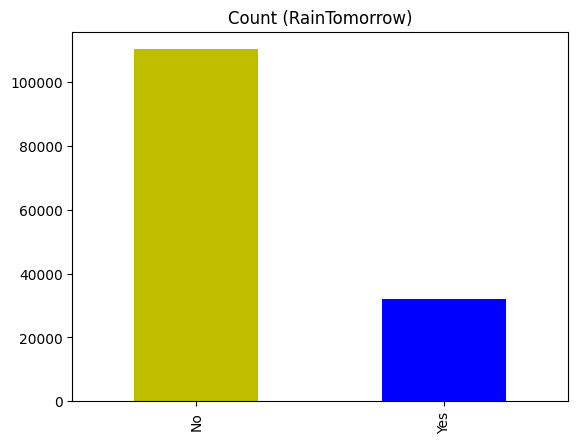

In [49]:

df['RainTomorrow'].value_counts().plot(kind='bar', title='Count (RainTomorrow)', color=['y', 'b'])

In [50]:
df.isnull().sum()

MinTemp           1485
MaxTemp           1261
Rainfall          3261
WindGustSpeed    10263
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [51]:
df.duplicated().sum()

331

<AxesSubplot: >

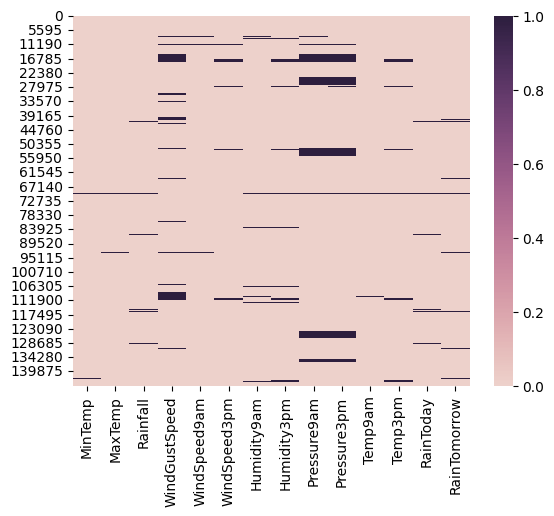

In [52]:
# peta panas (heatmap) yang menunjukkan keberadaan nilai-nilai yang hilang (NaN) dalam dataframe 
sns.heatmap( df.isnull(),cmap=sns.cubehelix_palette(as_cmap=True))

mengisi nilai yang hilang (NA/null) dalam tiap kolom DataFrame df dengan memilih nilai acak dari daftar non-null kolom tersebut

In [53]:
fill_list = df['MinTemp'].dropna()
df['MinTemp'] = df['MinTemp'].fillna(pd.Series(np.random.choice(fill_list , size = len(df.index))))

In [54]:
df['MinTemp']

0         13.4
1          7.4
2         12.9
3          9.2
4         17.5
          ... 
145455     2.8
145456     3.6
145457     5.4
145458     7.8
145459    14.9
Name: MinTemp, Length: 145460, dtype: float64

In [55]:
fill_list = df['MaxTemp'].dropna()
df['MaxTemp'] = df['MaxTemp'].fillna(pd.Series(np.random.choice(fill_list , size = len(df.index))))

In [56]:
fill_list = df['Rainfall'].dropna()
df['Rainfall'] = df['Rainfall'].fillna(pd.Series(np.random.choice(fill_list , size = len(df.index))))

In [57]:
fill_list = df['WindGustSpeed'].dropna()
df['WindGustSpeed'] = df['WindGustSpeed'].fillna(pd.Series(np.random.choice(fill_list , size = len(df.index))))

In [58]:
fill_list = df['WindSpeed9am'].dropna()
df['WindSpeed9am'] = df['WindSpeed9am'].fillna(pd.Series(np.random.choice(fill_list , size = len(df.index))))

In [59]:
fill_list = df['WindSpeed3pm'].dropna()
df['WindSpeed3pm'] = df['WindSpeed3pm'].fillna(pd.Series(np.random.choice(fill_list , size = len(df.index))))

In [60]:
fill_list = df['Humidity9am'].dropna()
df['Humidity9am'] = df['Humidity9am'].fillna(pd.Series(np.random.choice(fill_list , size = len(df.index))))

In [61]:
fill_list = df['Humidity3pm'].dropna()
df['Humidity3pm'] = df['Humidity3pm'].fillna(pd.Series(np.random.choice(fill_list , size = len(df.index))))

In [62]:
fill_list = df['Temp9am'].dropna()
df['Temp9am'] = df['Temp9am'].fillna(pd.Series(np.random.choice(fill_list , size = len(df.index))))

In [63]:
fill_list = df['Pressure9am'].dropna()
df['Pressure9am'] = df['Pressure9am'].fillna(pd.Series(np.random.choice(fill_list , size = len(df.index))))

In [64]:
fill_list = df['Pressure3pm'].dropna()
df['Pressure3pm'] = df['Pressure3pm'].fillna(pd.Series(np.random.choice(fill_list , size = len(df.index))))

In [65]:
fill_list = df['Temp3pm'].dropna()
df['Temp3pm'] = df['Temp3pm'].fillna(pd.Series(np.random.choice(fill_list , size = len(df.index))))

In [66]:
fill_list = df['RainToday'].dropna()
df['RainToday'] = df['RainToday'].fillna(pd.Series(np.random.choice(fill_list , size = len(df.index))))

In [67]:
fill_list = df['RainTomorrow'].dropna()
df['RainTomorrow'] = df['RainTomorrow'].fillna(pd.Series(np.random.choice(fill_list , size = len(df.index))))

In [68]:
df.isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

<AxesSubplot: >

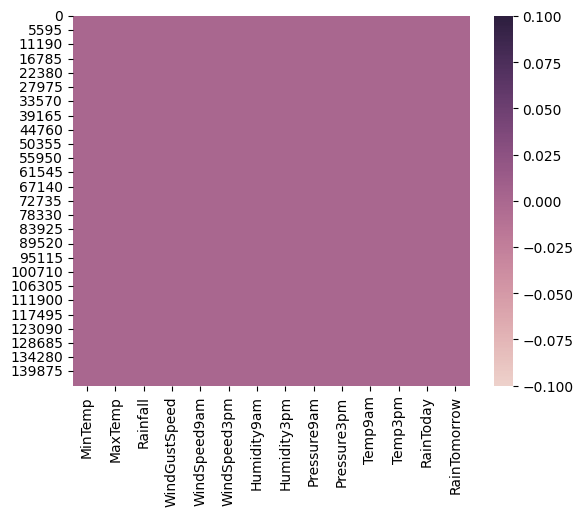

In [69]:
#membuat sebuah heatmap dengan menggunakan seaborn (sns) untuk memvisualisasikan pola nilai-nilai yang hilang (NA/null) dalam DataFrame
sns.heatmap( df.isnull(),cmap=sns.cubehelix_palette(as_cmap=True))

In [70]:
#mengganti nilai dalam kolom 'RainTomorrow' dalam DataFrame df dengan nilai numerik, yaitu nilai 'Yes' dengan 1 dan nilai 'No' dengan 2.
df['RainTomorrow'] = df['RainTomorrow'].map({'Yes': 1, 'No': 2})

In [71]:
df['RainTomorrow']

0         2
1         2
2         2
3         2
4         2
         ..
145455    2
145456    2
145457    2
145458    2
145459    2
Name: RainTomorrow, Length: 145460, dtype: int64

# **EDA (EXPLORATORY DATA ANALYST)**

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   MinTemp        145460 non-null  float64
 1   MaxTemp        145460 non-null  float64
 2   Rainfall       145460 non-null  float64
 3   WindGustSpeed  145460 non-null  float64
 4   WindSpeed9am   145460 non-null  float64
 5   WindSpeed3pm   145460 non-null  float64
 6   Humidity9am    145460 non-null  float64
 7   Humidity3pm    145460 non-null  float64
 8   Pressure9am    145460 non-null  float64
 9   Pressure3pm    145460 non-null  float64
 10  Temp9am        145460 non-null  float64
 11  Temp3pm        145460 non-null  float64
 12  RainToday      145460 non-null  object 
 13  RainTomorrow   145460 non-null  int64  
dtypes: float64(12), int64(1), object(1)
memory usage: 15.5+ MB


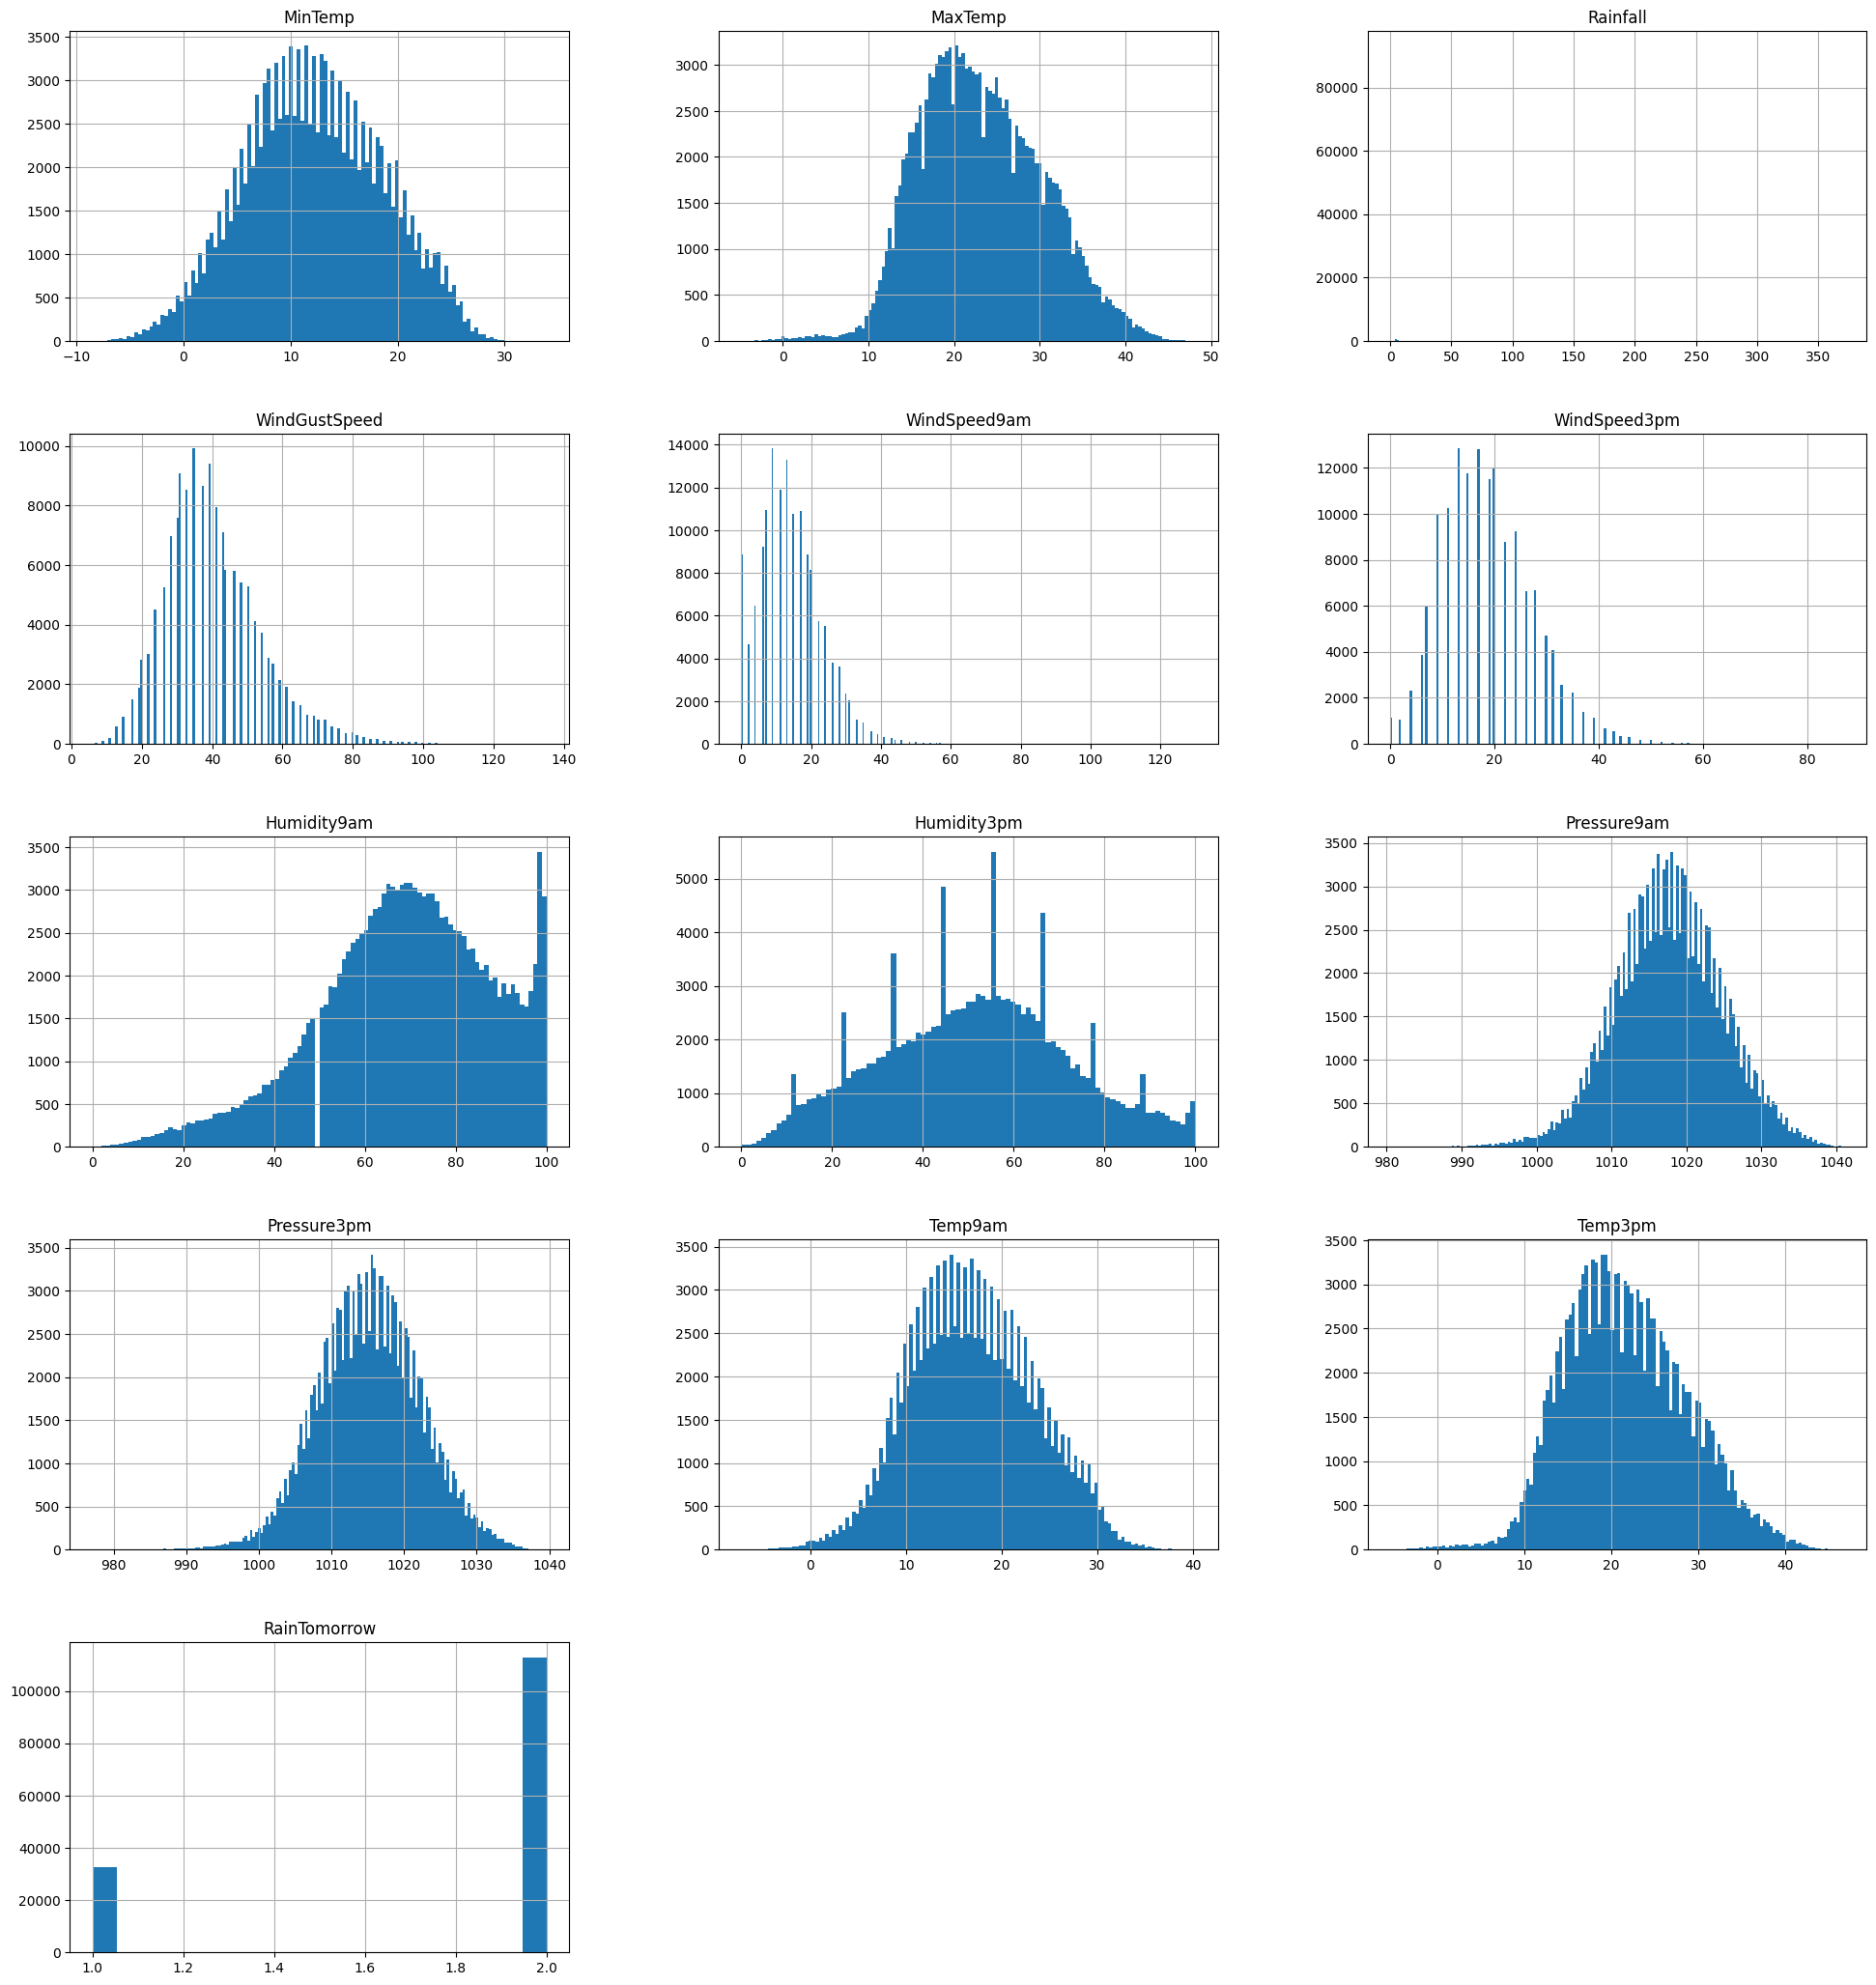

In [73]:
# Melihat distribusi frekuensi
df.hist(bins='auto',layout=(15,3), figsize=(24,80));

In [75]:
# describe atttribute categorical
df_categorical = df[['MinTemp', 'MaxTemp', 'WindGustSpeed','WindSpeed9am','Humidity3pm','RainToday']]
df_categorical.describe()

,MinTemp,MaxTemp,WindGustSpeed,WindSpeed9am,Humidity3pm
count,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000
mean,12.194017,23.221576,40.031954,14.042087,51.547999
std,6.397265,7.118405,13.624677,8.917022,20.794748
min,-8.500000,-4.800000,6.000000,0.000000,0.000000
25%,7.600000,17.900000,31.000000,7.000000,37.000000
50%,12.000000,22.600000,39.000000,13.000000,52.000000
75%,16.900000,28.200000,48.000000,19.000000,66.000000
max,33.900000,48.100000,135.000000,130.000000,100.000000


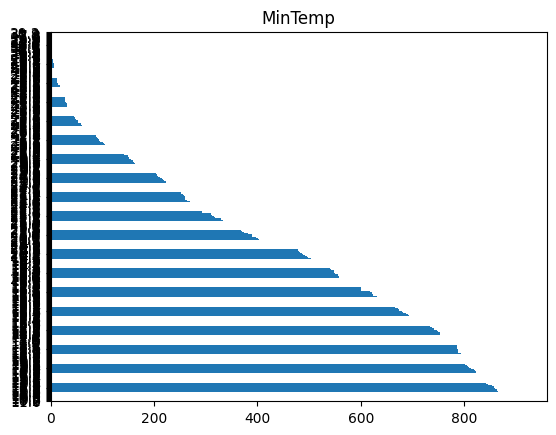

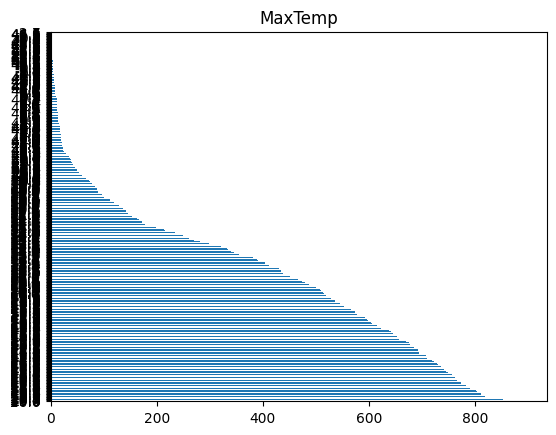

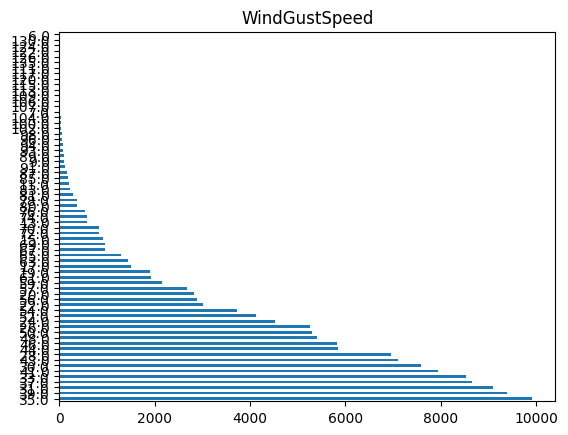

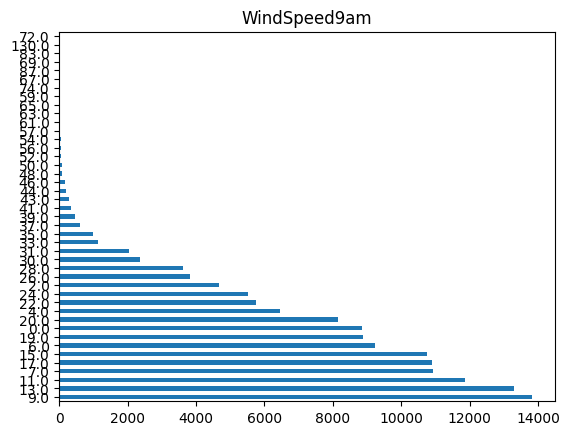

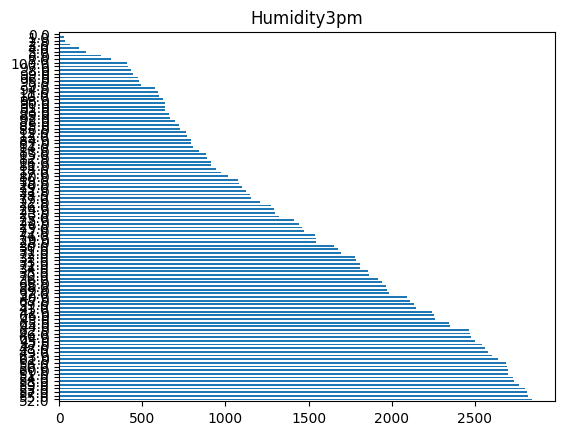

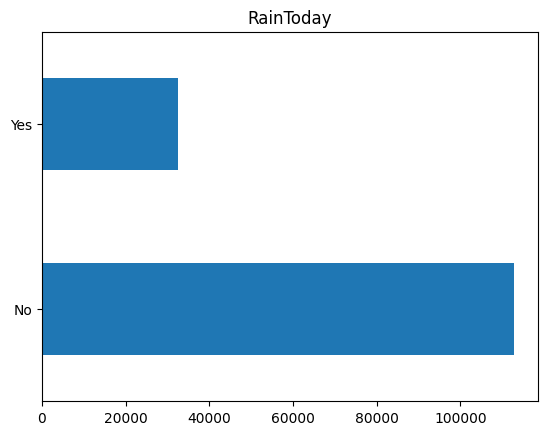

In [93]:
#melakukan visualisasi grafik batang horizontal untuk setiap kolom dalam DataFrame df_categorical
for column in df_categorical.columns:
    df_categorical[column].value_counts().plot(kind='barh')  # Hanya menampilkan 10 data teratas
    plt.title(column)
    plt.show()

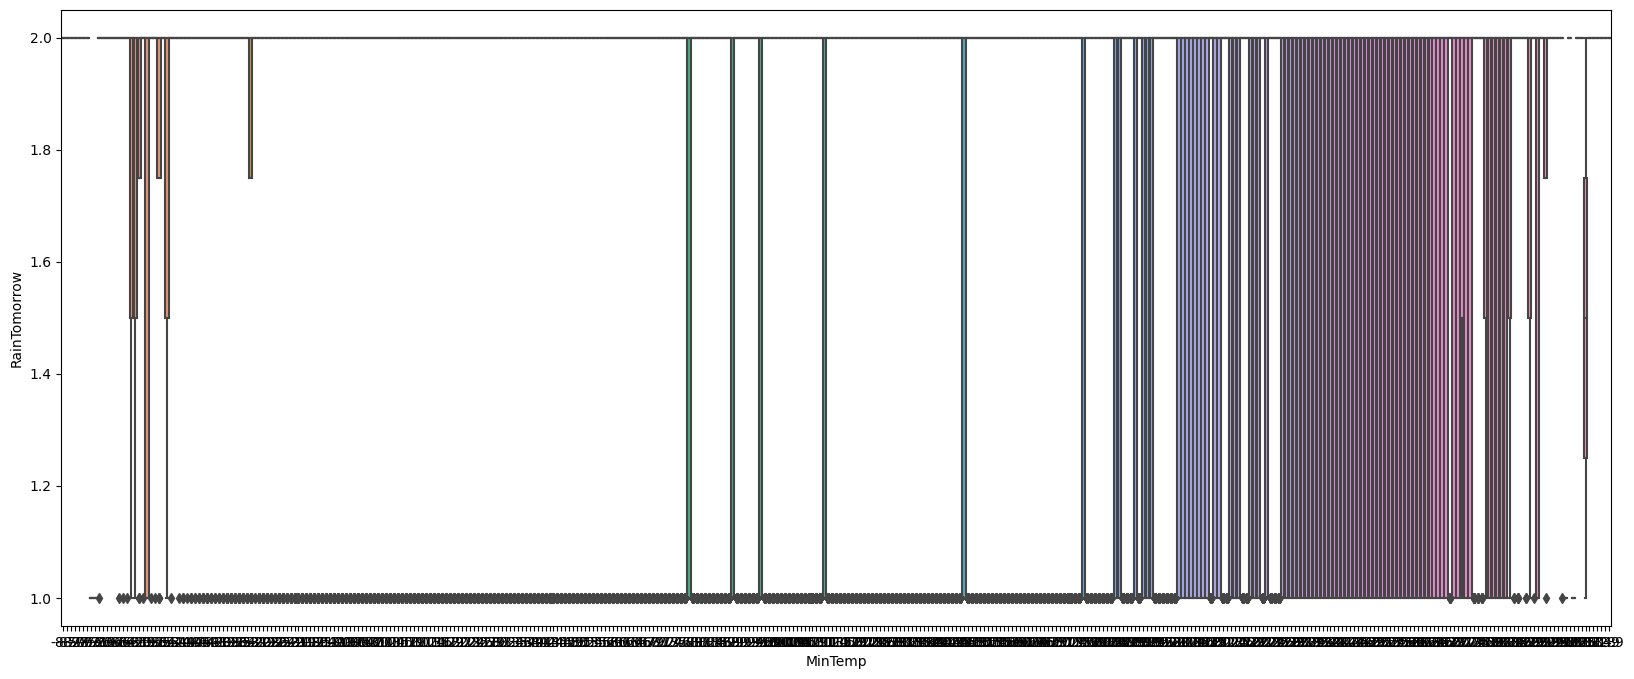

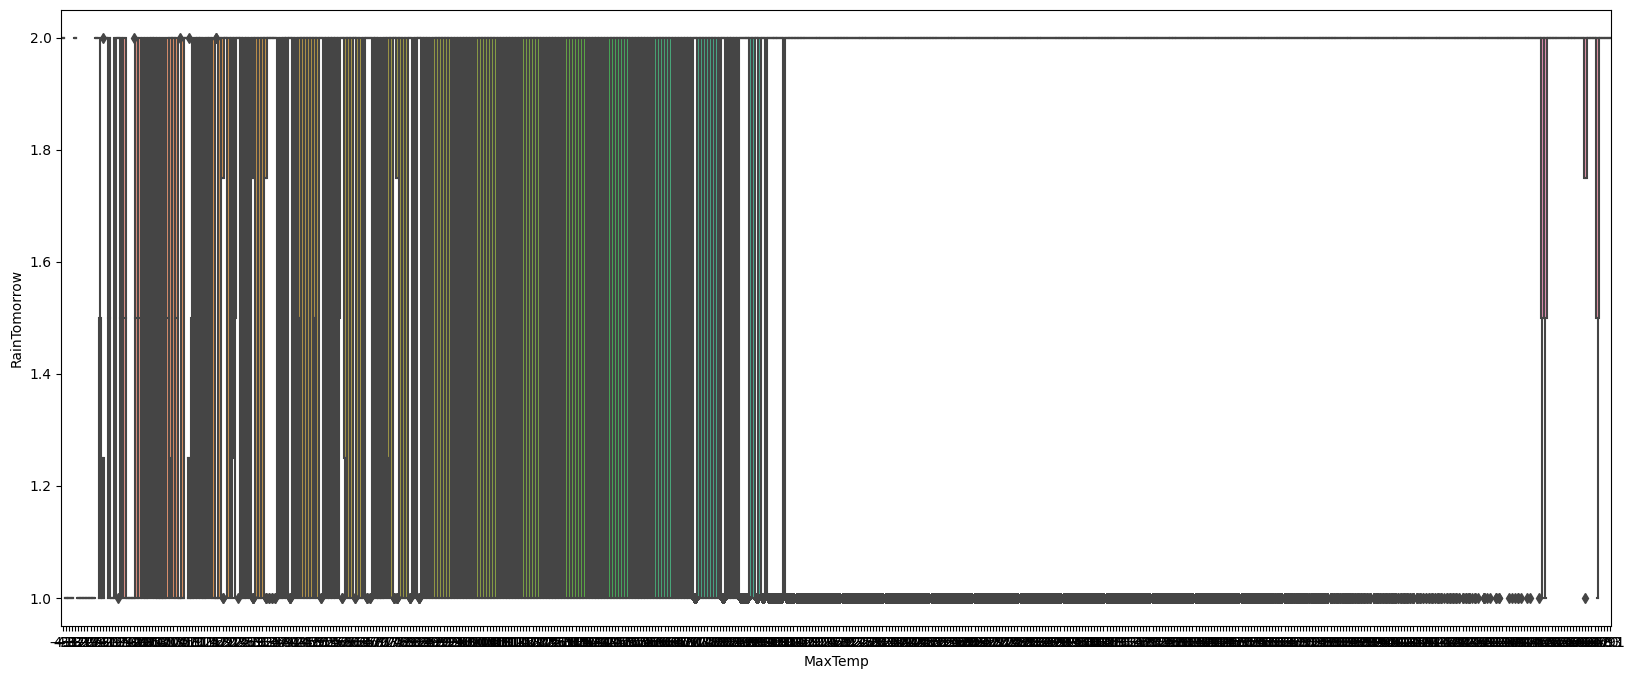

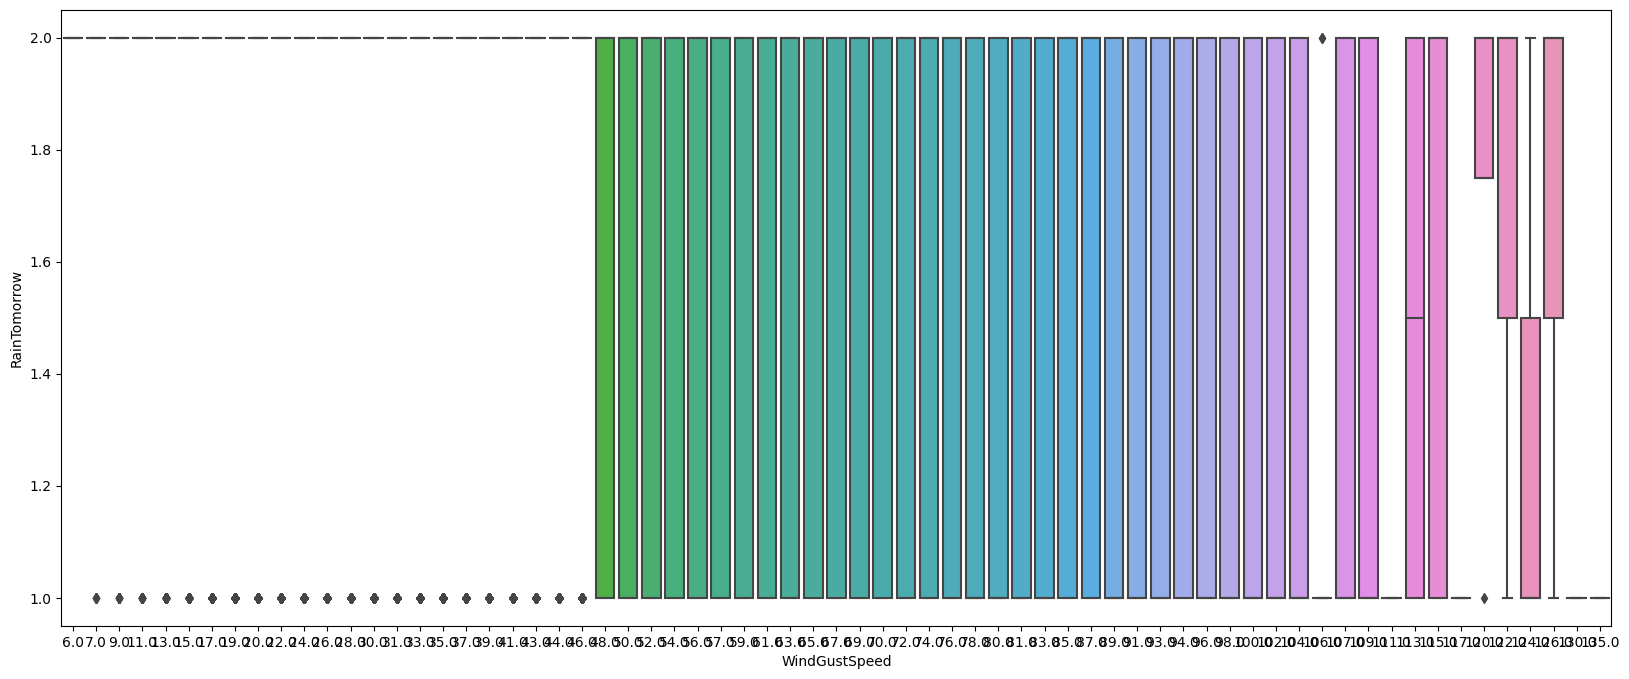

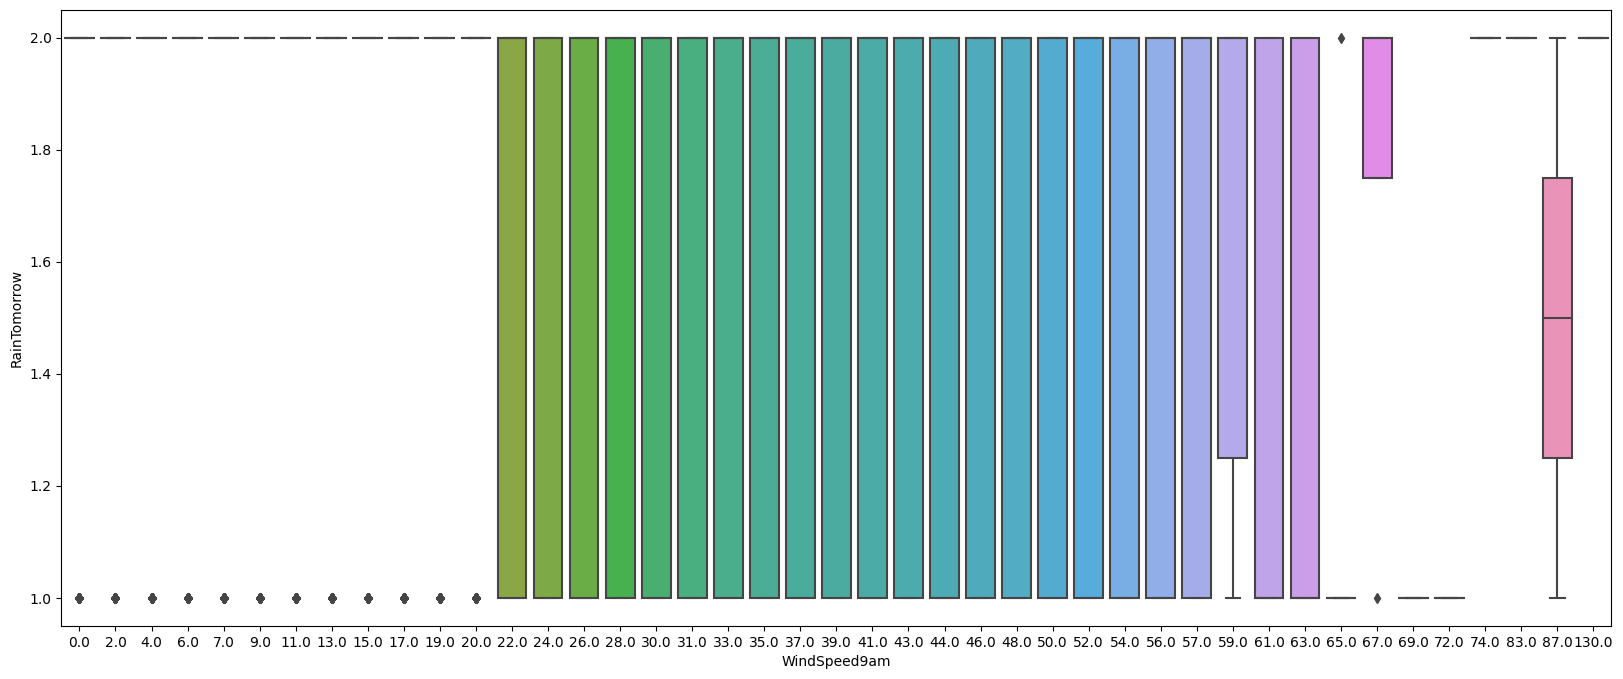

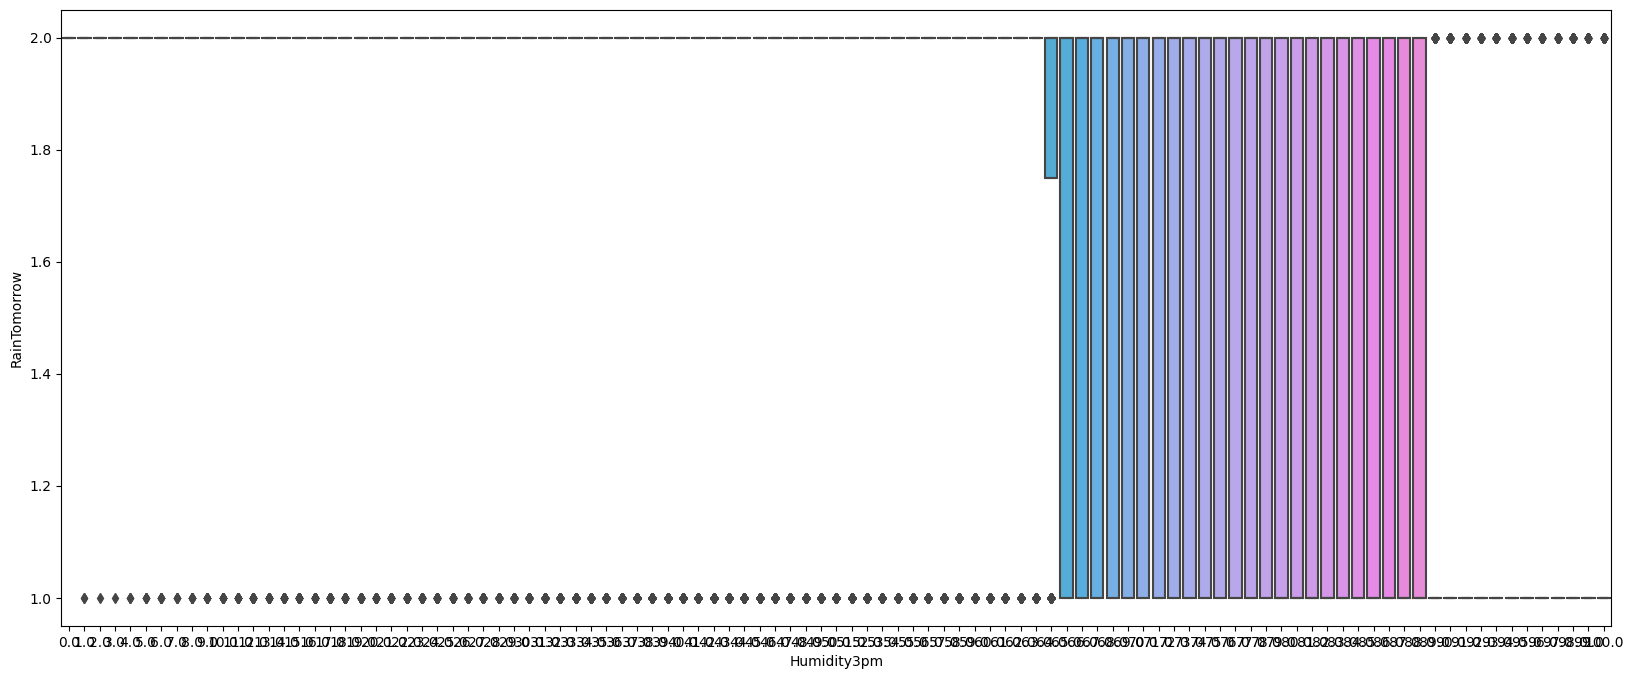

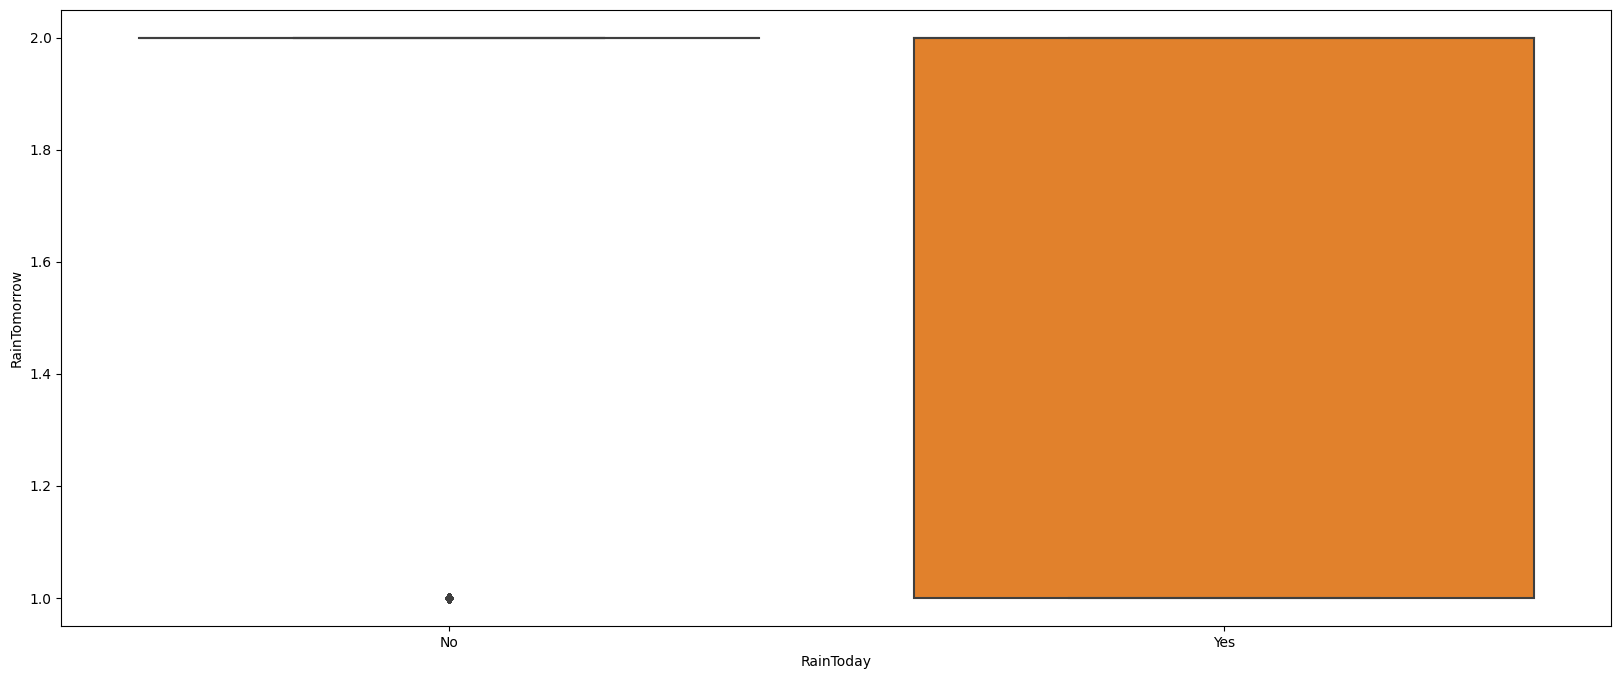

In [77]:
x = df[['MinTemp', 'MaxTemp', 'WindGustSpeed','WindSpeed9am','Humidity3pm','RainToday']]
y = df['RainTomorrow']

for categorical in x.columns:
    sns.boxplot(x=x[categorical], y=y, data=df)
    plt.gcf().set_size_inches((20,8))
    plt.show()

In [78]:
#menghasilkan daftar kolom yang terdiri dari semua kolom dalam DataFrame df, kecuali kolom-kolom yang disebutkan dalam list dibawah
columns_continue = df.columns
columns_continue = [x for x in columns_continue if x not in ['MinTemp', 'MaxTemp', 'WindGustSpeed','WindDir9am','WindDir3pm']]

In [79]:
len(columns_continue)

11

In [80]:
columns_continue

['Rainfall',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Temp9am',
 'Temp3pm',
 'RainToday',
 'RainTomorrow']

Membuat sebuah boxplot untuk beberapa atribut berkelanjutan (continuous) dalam DataFrame df. Boxplot akan menunjukkan distribusi nilai dan outliers dari atribut-atribut yang dipilih.

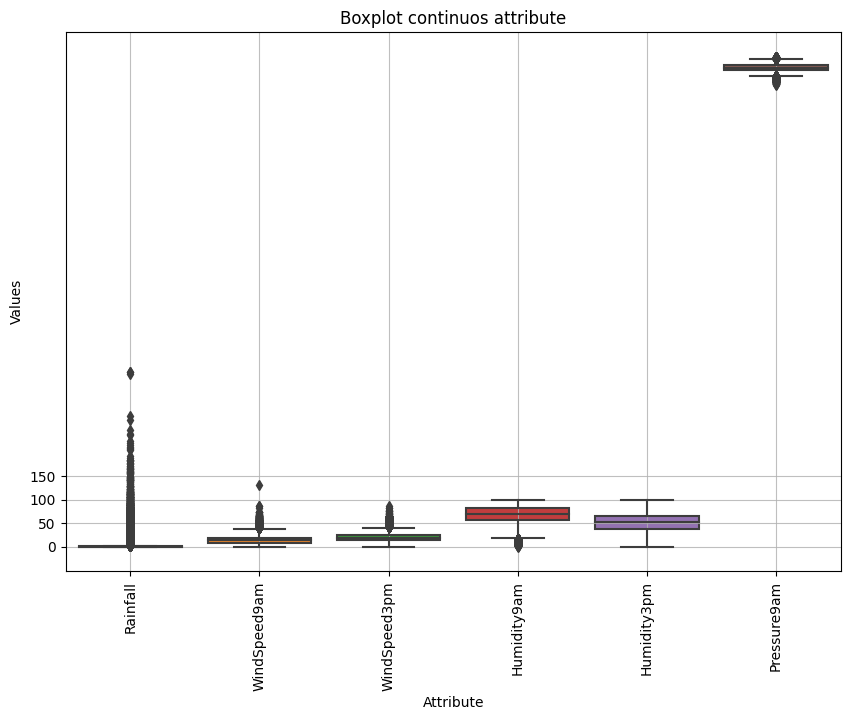

In [81]:
plt.figure(figsize=(10,7))
plt.title("Boxplot continuos attribute")
sns.boxplot(df[ ['Rainfall',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am']])
plt.xlabel("Attribute")
plt.ylabel("Values")
plt.yticks(np.arange(0,200, 50))
plt.xticks(rotation=90)
plt.grid(alpha=0.8)
plt.show()

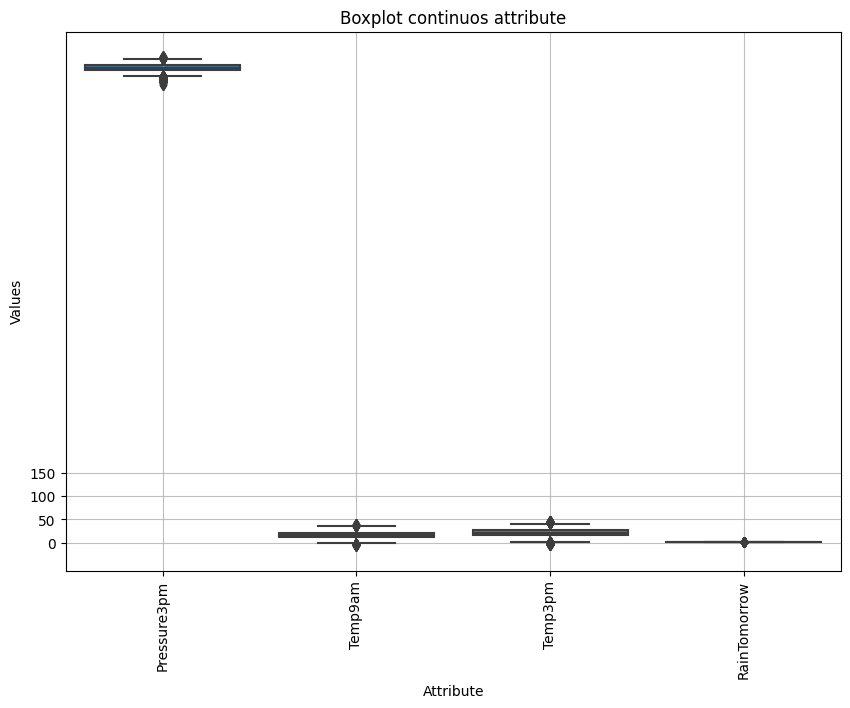

In [82]:
plt.figure(figsize=(10,7))
plt.title("Boxplot continuos attribute")
sns.boxplot(df[ ['Pressure3pm',
 'Temp9am',
 'Temp3pm',
 'RainToday',
 'RainTomorrow']])
plt.xlabel("Attribute")
plt.ylabel("Values")
plt.yticks(np.arange(0,200, 50))
plt.xticks(rotation=90)
plt.grid(alpha=0.8)
plt.show()

In [83]:
#Menggunakan LabelEncoder dari library scikit-learn (sklearn.preprocessing) untuk mengubah nilai-nilai dalam setiap kolom kategorikal (df_categorical) DataFrame df menjadi nilai numerik.
from sklearn.preprocessing import LabelEncoder

for column in df_categorical.columns:
    label_encoder = LabelEncoder()
    df[column] = label_encoder.fit_transform(df[column])

In [84]:
df['RainTomorrow'].unique()

array([2, 1], dtype=int64)

# MODELING

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   MinTemp        145460 non-null  int64  
 1   MaxTemp        145460 non-null  int64  
 2   Rainfall       145460 non-null  float64
 3   WindGustSpeed  145460 non-null  int64  
 4   WindSpeed9am   145460 non-null  int64  
 5   WindSpeed3pm   145460 non-null  float64
 6   Humidity9am    145460 non-null  float64
 7   Humidity3pm    145460 non-null  int64  
 8   Pressure9am    145460 non-null  float64
 9   Pressure3pm    145460 non-null  float64
 10  Temp9am        145460 non-null  float64
 11  Temp3pm        145460 non-null  float64
 12  RainToday      145460 non-null  int32  
 13  RainTomorrow   145460 non-null  int64  
dtypes: float64(7), int32(1), int64(6)
memory usage: 15.0 MB


In [86]:
#Memmbagi DataFrame df menjadi dua bagian: df_features (yang berisi semua kolom kecuali 'RainTomorrow') dan df_targets (yang berisi kolom 'RainTomorrow').
df_features = df.drop(['RainTomorrow'], axis=1)
df_targets = df['RainTomorrow']

In [87]:
#Mengimpor beberapa kelas dari beberapa moodul dalam library scikit learn
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, mean_absolute_error, mean_squared_error, r2_score

In [88]:
#Membagi data menjadi data train dan data test menggunakan fungsi train_test_split dari modul model_selection dalam library scikit-learn
X_train, X_test, y_train, y_test = train_test_split(df_features, df_targets, test_size=0.8, random_state=10)

In [89]:
print(X_train.shape, y_train.shape)

(29092, 13) (29092,)


In [90]:
print(X_train.value_counts(), y_train.value_counts())

MinTemp  MaxTemp  Rainfall  WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Temp9am  Temp3pm  RainToday
1        25       0.0       23             7             13.0          83.0         93           1014.0       1022.9       -5.3     -1.2     0            1
230      336      0.0       18             8             17.0          40.0         31           1019.4       1015.8        21.4     28.0    0            1
231      203      0.0       31             12            35.0          86.0         45           1014.2       1014.4        15.2     15.6    0            1
230      408      0.0       17             10            11.0          9.0          8            1018.1       1012.9        32.4     36.7    0            1
         407      0.0       15             6             15.0          25.0         19           1012.6       1010.0        28.1     36.3    0            1
                                                                     

Menggunakan Logistic Regression untuk melatih model dan menghitung akurasi dari prediksi model.

In [100]:
#Mengimpor kelas LogisticRegression dari sklearn.linear_model, fungsi train_test_split dari sklearn.model_selection, dan accuracy_score dari sklearn.metrics.
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#Membuat objek LogisticRegression dengan LogisticRegression() dan melatih model menggunakan metode .fit() dengan data latih X_train dan y_train
logistic_Regresion = LogisticRegression()
logistic_Regresion.fit(X_train, y_train)

#Menggunakan model yang telah dilatih untuk melakukan prediksi pada data uji X_test dengan menggunakan metode .predict() dan menyimpan hasil prediksi dalam y_pred_logistic_regression.
y_pred_logistic_regression = logistic_Regresion.predict(X_test)

#Menghitung akurasi dengan membandingkan prediksi y_pred_logistic_regression dengan target aktual y_test menggunakan fungsi accuracy_score()
accuracy_loistic_regression = accuracy_score(y_test, y_pred_logistic_regression)

print("Model accuracy score:", accuracy_loistic_regression)


Model accuracy score: 0.8295837343599615


c:\Users\Erika Winckler\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [99]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

svc = SVC()
svc.fit(X_train, y_train)

y_pred_svc = svc.predict(X_test)
accuracy_svc = accuracy_score(y_test, y_pred_svc)

print("Model accuracy score:", accuracy_svc)

Model accuracy score: 0.7888079197030111


# Kesimpulan : 
Menurut saya menggunakan algoritma SVM (Support Vector Machine) lebih cocok digunakan karena hasil model accuracy score yang didapatkan lebih kecil dibandingkan algoritma Logistic Regression.